p 0.35714285714285715
1.51196976
[[9.99090000e+06 7.00000000e+02 1.50000000e+03 6.70000000e+03]
 [9.99089912e+06 6.97713483e+02 1.50108335e+03 6.70208292e+03]
 [9.99089824e+06 6.95434436e+02 1.50215719e+03 6.70416502e+03]
 ...
 [9.99063067e+06 5.34215602e-15 2.14650879e-11 9.16932668e+03]
 [9.99063067e+06 5.34197999e-15 2.14643964e-11 9.16932668e+03]
 [9.99063067e+06 5.34180396e-15 2.14637049e-11 9.16932668e+03]]


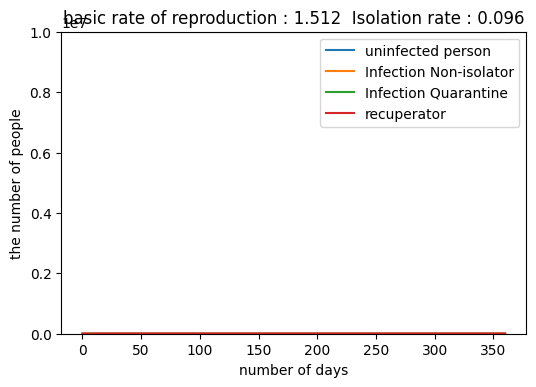

In [434]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#import sys

#qは無症状感染者の隔離
#pは発症者の隔離
def SIQR(v, t, beta, gamma, gamma_dash, p, q):
    #print(v[1])
    #if v[1] > 0.1:
        #p = 250/v[1]
    #print(p)
    rvalue = [0,0,0,0]
    rvalue[0] = - beta * v[0] * v[1]
    rvalue[1] = (1 - q) * beta * v[0] * v[1] - p * v[1] - gamma * v[1]
    rvalue[2] = q * beta * v[0] * v[1] + p * v[1] - gamma_dash * v[2]
    rvalue[3] = gamma * v[1] + gamma_dash * v[2]
    #print(q)
    return rvalue

def calc_proc(times, beta_const, gamma_const, gamma_dash_const, p, q):
    S_0=9990900
    I_0=700
    Q_0=1500
    R_0=6700
    ini_state = [S_0,I_0,Q_0,R_0]
    p = 250/I_0
    print("p",p)

    args  =(beta_const, gamma_const, gamma_dash_const, p, q)

    N_total = S_0 + I_0 + Q_0 + R_0
    
    R0 = N_total * beta_const * (1/gamma_const)
    print(R0)
    
    result = odeint(SIQR, ini_state, times, args)
    print(result)
    return R0,result


def plot(R0, p, times, result):
    str_out = "basic rate of reproduction : {}".format(format(R0, ".3f"))
    str_out += "  "
    str_out += "Isolation rate : {}".format(format(p, ".3f"))
    plt.figure(dpi=100)
    plt.title(str_out)
    plt.xlabel('number of days')
    plt.ylabel('the number of people')
    plt.ylim(0,10000000)
    plt.plot(times, result)
    plt.legend(['uninfected person','Infection Non-isolator','Infection Quarantine','recuperator'])
    plt.show()


if __name__ == "__main__":
    #sys.stderr.write("*** start ***\n")
    t_max = 360
    dt = 0.01
    beta_const = 0.126/10000000
    gamma_const = 1/12
    gamma_dash_const = 1/10
    
    #p = 0.096
    q = 0.1
    
    #sys.stderr.write("p_kakuri = %.3f\n" % p)

    times =np.arange(0,t_max, dt)
    R0,result= calc_proc(times, beta_const, gamma_const, gamma_dash_const, p, q)
    plot(R0,p,times,result)
#
    #sys.stderr.write("*** end ***\n")




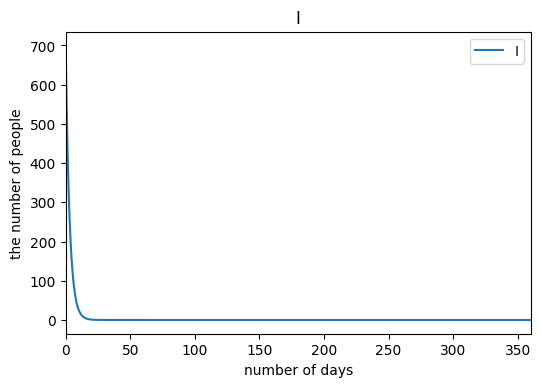

In [435]:
#I096 = [result096[i][1] for i in range(16000)]
#I296 = [result296[i][1] for i in range(16000)]
#I496 = [result496[i][1] for i in range(16000)]
I = [result[i][1] for i in range(36000)]

plt.figure(dpi=100)
#plt.plot(times, I096, label="I096")
#plt.plot(times, I296,label="I296")
#plt.plot(times, I496,label="I496")
plt.plot(times, I,label="I")
plt.xlim(0,360)
plt.xlabel('number of days')
plt.ylabel('the number of people')
plt.title("I")
plt.legend()
plt.show()


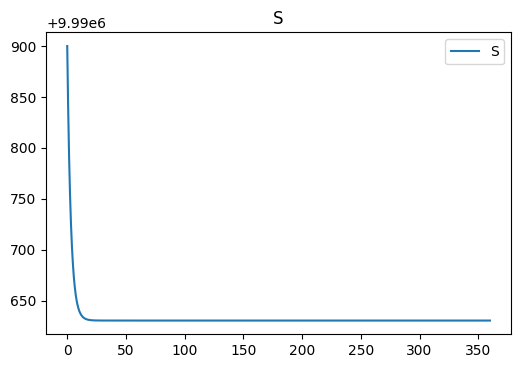

269.3119797129184
9990900.0


In [436]:
#I096 = [result096[i][0] for i in range(16000)]
#I296 = [result296[i][0] for i in range(16000)]
#I496 = [result496[i][0] for i in range(16000)]
S = [result[i][0] for i in range(36000)]
plt.figure(dpi=100)
#plt.plot(times, I096, label="I096")
#plt.plot(times, I296,label="I296")
#plt.plot(times, I496,label="I496")
plt.plot(times, S,label="S")
plt.title("S")
plt.legend()
plt.savefig("SIQR-S.png")
plt.show()

print(S[0] - S[100*30])
print(S[0])

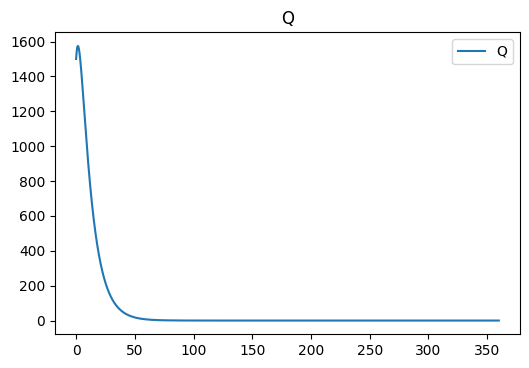

1528.2844837190798

In [437]:
#I096 = [result096[i][0] for i in range(16000)]
#I296 = [result296[i][0] for i in range(16000)]
#I496 = [result496[i][0] for i in range(16000)]
Q = [result[i][2] for i in range(36000)]
plt.figure(dpi=100)
plt.plot(times, Q,label="Q")
plt.title("Q")
plt.legend()
#plt.savefig("SIQR-S.png")
plt.show()
Q[100*3]

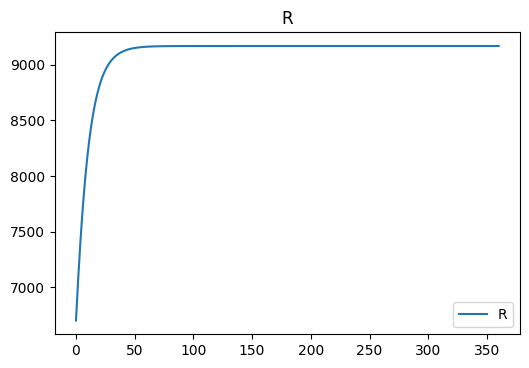

7277.8046299743755

In [438]:
#I096 = [result096[i][0] for i in range(16000)]
#I296 = [result296[i][0] for i in range(16000)]
#I496 = [result496[i][0] for i in range(16000)]
R = [result[i][3] for i in range(36000)]
plt.figure(dpi=100)
plt.plot(times, R,label="R")
plt.title("R")
plt.legend()
#plt.savefig("SIQR-S.png")
plt.show()
R[100*3]

In [391]:
250/700

0.35714285714285715

In [ ]:
    """
    Define the SIQR model.
    
    Parameters
    ----------------
    v: list
        v = [S, I, Q, R]
        S: 未感染者
        I: 市中感染者
        Q: 隔離者
        R: 回復(抗体保持)
    t: float
        represent time. need for scipy.odeint.
    beta: float
        感染割合
    gamma: float
        回復割合
    p: float
        隔離率
    
    Returns
    -----------
    rvalue: list
        rvalue = [S', I', Q', R']
    """
    
    
        """
    数値計算 using odeint.
    
    Parameter
    --------------
    
    
    Returns
    -----------
    R0: float
        基本再生産数. 感染した1人の感染者が, 
        誰も免疫を持たない集団に加わったとき
        平均して何人に直接感染させる人数.
    
    result: float
        数値計算の結果.
        
    """

In [68]:
1/12

0.08333333333333333